In [15]:
# Arquivo integrante do projeto para identificação dos preditores mais correlacionados 
# aos óbitos por COVID no Brasil, apresentado à PUC-MINAS como TCC

In [16]:
import numpy as np
import pandas as pd
import datetime
import os.path

# Modelos sem feature selection

In [17]:
#  Serão utilizadas todas as variáveis pre-selecionadas


In [18]:
%run ./funcoes.ipynb

In [19]:
# Carrega a base tratada mas não balanceada, usada para a definição das variáveis de cada modelo
# Produzida pelo notebook COVID_Preprocessamento.ipynb
arquivo_base = "INFLUD21-29-03-2021.csv"  
ext_file = "_processed_pre_dummies.csv"
rad_filename = arquivo_base[:-4]  #exclui a extensão do arquivo
filename_pre_des = rad_filename + ext_file
covid_df_pre_dummies = load_df(filename_pre_des,";",None,None) #carrega os dados do arquivo csv parcialmente preprocessado
print('Núm. linhas e colunas:',covid_df_pre_dummies.shape) #exibe a quantidade de linhas e colunas do dataframe

Núm. linhas e colunas: (254948, 43)


In [20]:
# Excluir variável redundante
covid_df_pre_dummies = covid_df_pre_dummies.drop(['NU_IDADE_CAT'], axis = 1)

Arquivo informado: INFLUD21-29-03-2021_processed_pre_dummies.csv
Verifica existencia do arquivo: False
Arquivo INFLUD21-29-03-2021_processed_pre_dummies_135_proc_smote_over.csv não encontrado.
Aguarde, efetuando balanceamento das classes da variável alvo...
0    175920
1     79028
Name: OBT_COVID, dtype: int64
SMOTE over-sampling:
0    175920
1    175920
Name: OBT_COVID, dtype: int64


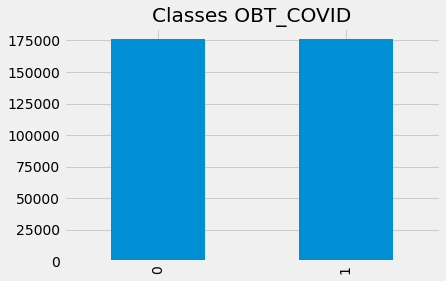

In [21]:
#Converte os tipos das variaveis do dataframe
covid_df_pre_dummies_cat = converte_tipo_category(covid_df_pre_dummies)
#Converte as variáveis categóricas em binárias (dummies)
covid_df_pre_dummies_bin = converte_binarios(covid_df_pre_dummies_cat) 
#Normalizada as colunas contínuas
covid_df_pre_dummies_nor = normaliza_dados(covid_df_pre_dummies_bin)
# Balanceamento da base de desenvolvimento Com SMOTE oversampling
#covid_df_pre_dummies_bal = imblearn_SMOTE_oversampling(covid_df_pre_dummies_nor,arquivo_base,False,'OBT_COVID')
covid_df_pre_dummies_bal = imblearn_SMOTE_oversampling(covid_df_pre_dummies_nor,filename_pre_des,False,'OBT_COVID')
# Criação dos datasets de treino e teste
train, test = train_test_split(covid_df_pre_dummies_bal, test_size=0.25, random_state=42)
#Separa as variaveis do dataset de treino em independentes e dependente (alvo)
labels = train.columns[:-1]  #última coluna comtém o atributo dependente (OBT_COVID)
X_train = train[labels] #dataframe com todas as colunas exceto a variável alvo
y_train = train['OBT_COVID'].astype('category') #ndarray com a variável a ser classificada.
x_test = test[labels]
y_test = test['OBT_COVID'].astype('category') #ndarray com a variável a ser classificada.

In [22]:
# Variavel para armazenar os relatórios de desempenho
report={}

In [23]:
covid_df_pre_dummies_bal

,NU_IDADE_N,GeoSES,AN_SARS2_1.0,AN_SARS2_9.0,ASMA_1.0,ASMA_2.0,ASMA_9.0,CARDIOPATI_1.0,CARDIOPATI_2.0,CARDIOPATI_9.0,...,UTI_1.0,UTI_2.0,UTI_9.0,VACINA_1.0,VACINA_2.0,VACINA_9.0,VOMITO_1.0,VOMITO_2.0,VOMITO_9.0,OBT_COVID
0,0.646154,0.662604,0,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0.546154,0.662604,0,1,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,0.669231,0.662604,0,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
3,0.600000,0.662604,0,1,0,1,0,1,0,0,...,0,0,1,0,0,1,0,1,0,1
4,0.661538,0.662604,0,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351835,0.565148,0.622092,0,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,1
351836,0.466494,0.481421,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,1
351837,0.491169,0.546128,0,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
351838,0.515525,0.482540,0,1,0,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,1


# Logistic Regression

Selecionado modelo LogisticRegression padrão.
C:\Users\02373373718\Anaconda3\envs\Pycaret\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     43926
           1       0.89      0.85      0.87     44034

    accuracy                           0.87     87960
   macro avg       0.87      0.87      0.87     87960
weighted avg       0.87      0.87      0.87     87960



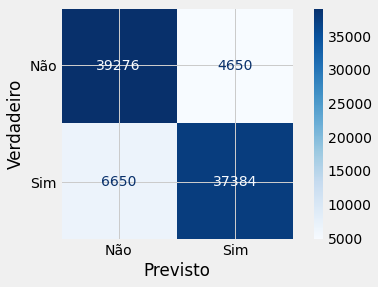

In [24]:
# Cria modelo LogisticRegfression com os hiperparâmetros ajustados através do respectivo notebook e sem feature selection (RFE)
modelo_LogisticReg = cria_modelo(X_train,y_train,"2")
# Avalia o modelo
report = avalia_modelo(x_test,y_test,modelo_LogisticReg,report, "smote_NO_feat")

#  XGBoost/XGBClassifier

Selecionado modelo XGBClassifier padrão.
C:\Users\02373373718\Anaconda3\envs\Pycaret\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[12:40:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     43926
           1       0.90      0.88      0.89     44034

    accuracy                           0.89     87960
   macro avg     

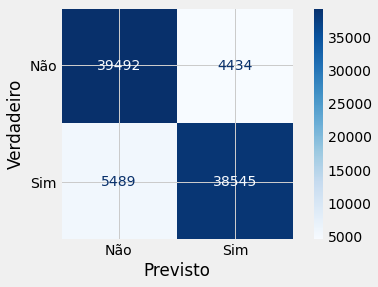

In [25]:
# Cria modelo XGBClassifier com os parametros ajustados através da função/notebook e sem feature selection (RFE)
modelo_XGBClassifier = cria_modelo(X_train,y_train,"1")
report = avalia_modelo(x_test,y_test,modelo_XGBClassifier,report, "XGB_NO_feat")

#  DecisionTree

Selecionado modelo DecisionTreeClassifier padrão.
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     43926
           1       0.82      0.82      0.82     44034

    accuracy                           0.82     87960
   macro avg       0.82      0.82      0.82     87960
weighted avg       0.82      0.82      0.82     87960



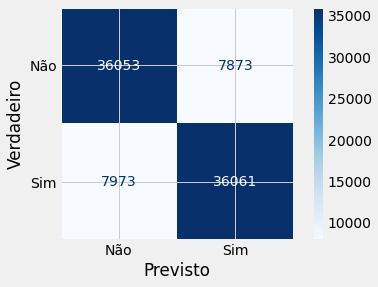

In [26]:
# Cria modelo Decision Tree com os parametros ajustados através da função/notebook e sem feature selection (RFE)
# Treino com dados balanceados 
modelo_DecisionTree = cria_modelo(X_train,y_train,"5")
## avalia o modelo DecisionTree
report = avalia_modelo(x_test,y_test,modelo_DecisionTree,report,"_DTree_NO_feat")

# ExtraTreesClassifier

Selecionado modelo ExtraTreesClassifier padrão.
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     43926
           1       0.89      0.89      0.89     44034

    accuracy                           0.89     87960
   macro avg       0.89      0.89      0.89     87960
weighted avg       0.89      0.89      0.89     87960



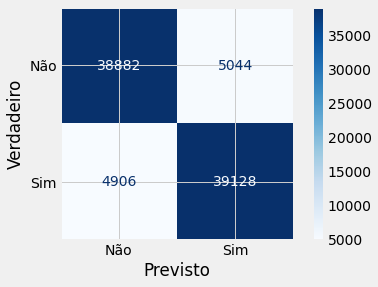

In [27]:
# Cria modelo ExtraTreesClassifier sem feature selection (RFE)
# Treino com dados balanceados 
modelo_ExtraTree = cria_modelo(X_train,y_train,"7")
## avalia o modelo SVM
report = avalia_modelo(x_test,y_test,modelo_ExtraTree,report,"_ExtraTree_NO_feat")

In [28]:
for modelos,score in report.items():
    print(modelos)
    print(score)

LogisticRegressionsmote_NO_feat
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     43926
           1       0.89      0.85      0.87     44034

    accuracy                           0.87     87960
   macro avg       0.87      0.87      0.87     87960
weighted avg       0.87      0.87      0.87     87960

XGBClassifierXGB_NO_feat
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     43926
           1       0.90      0.88      0.89     44034

    accuracy                           0.89     87960
   macro avg       0.89      0.89      0.89     87960
weighted avg       0.89      0.89      0.89     87960

DecisionTreeClassifier_DTree_NO_feat
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     43926
           1       0.82      0.82      0.82     44034

    accuracy                           0.82     87960
   macro avg       0.82      0.82 